### Load required packages

In [1]:
import os
import warnings
import scvi
import anndata
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
%matplotlib inline

sc.settings.n_jobs = 32
warnings.filterwarnings("ignore")

pwd = os.getcwd()

Global seed set to 0


### Load and prepare data

In [2]:
adata_mvi = anndata.read_h5ad(filename="multivi_AD_3cohorts_RNA_ATAC_Multiome_v1.2_trained.h5ad")

In [3]:
ad_obs = adata_mvi.obs.copy()
ad_obs.reset_index(inplace=True)
ad_obs

,level_0,orig.ident,nCount_RNA,nFeature_RNA,sample_id,bc,ar_id,umi.counts,barcodes,gene.counts.0,...,Vip_6,Vip_9,supertype_scANVI,supertype_conf_scANVI,supertype_multiome_mask,supertype_singleome_mask,batch_id,modality,_scvi_batch,_scvi_labels
0,AAACAGCCAAACATAG-L8XR_210916_02_B11_paired,SeuratProject,52004.0,8569.0,AAACAGCCAAACATAG-L8XR_210916_02_B11-1131607954,AAACAGCCAAACATAG,1.131608e+09,52004.0,AAACAGCCAAACATAG,8569.0,...,0.0,0.0,L5 IT_5,0.999973,L5 IT_Neuron_doublet,,1.0,paired,2,0
1,AAACAGCCAAACCTTG-L8XR_210715_01_E12_paired,SeuratProject,786.0,610.0,AAACAGCCAAACCTTG-L8XR_210715_01_E12-1121747487,AAACAGCCAAACCTTG,1.121747e+09,786.0,AAACAGCCAAACCTTG,610.0,...,0.0,0.0,L5 IT_3,1.000000,L5 IT_Empty_LQ,,1.0,paired,2,0
2,AAACAGCCAAACTGCC-L8XR_210722_01_H07_paired,SeuratProject,50207.0,9186.0,AAACAGCCAAACTGCC-L8XR_210722_01_H07-1122543705,AAACAGCCAAACTGCC,1.122544e+09,50207.0,AAACAGCCAAACTGCC,9186.0,...,0.0,0.0,L6 IT_2,1.000000,,,1.0,paired,2,0
3,AAACAGCCAAACTGTT-L8XR_210930_02_C03_paired,SeuratProject,13748.0,5685.0,AAACAGCCAAACTGTT-L8XR_210930_02_C03-1135448412,AAACAGCCAAACTGTT,1.135448e+09,13748.0,AAACAGCCAAACTGTT,5685.0,...,0.0,0.0,L5 IT_3,1.000000,L5 IT_Neuron_doublet,,1.0,paired,2,0
4,AAACAGCCAAAGCTCC-L8XR_211007_02_C04_paired,SeuratProject,80430.0,8985.0,AAACAGCCAAAGCTCC-L8XR_211007_02_C04-1135704089,AAACAGCCAAAGCTCC,1.135704e+09,80430.0,AAACAGCCAAAGCTCC,8985.0,...,0.0,0.0,L5 IT_1,1.000000,,,1.0,paired,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253605,TTTGTGTGTGCGCATC-L8AT_211117_01_F07_accessibility,NaN,NaN,NaN,TTTGTGTGTGCGCATC-L8AT_211117_01_F07-1144788667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,accessibility,0,0
1253606,TTTGTGTGTTACCCAA-L8AT_211117_01_F07_accessibility,NaN,NaN,NaN,TTTGTGTGTTACCCAA-L8AT_211117_01_F07-1144788667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,accessibility,0,0
1253607,TTTGTGTGTTTGACCA-L8AT_211117_01_F07_accessibility,NaN,NaN,NaN,TTTGTGTGTTTGACCA-L8AT_211117_01_F07-1144788667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,accessibility,0,0
1253608,TTTGTGTTCCCTAAAG-L8AT_211117_01_F07_accessibility,NaN,NaN,NaN,TTTGTGTTCCCTAAAG-L8AT_211117_01_F07-1144788667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,accessibility,0,0


In [4]:
column_select = ['donor_name', 'external_donor_name', 'age', 'sex', 'medical_conditions', 'method', 'library_prep']

In [10]:
ad_obs_1 = ad_obs[['level_0', 'sample_id', 'batch_id', 'modality', '_scvi_batch', '_scvi_labels'] + column_select]

In [12]:
ad_obs_1

,level_0,sample_id,batch_id,modality,_scvi_batch,_scvi_labels,donor_name,external_donor_name,age,sex,medical_conditions,method,library_prep
0,AAACAGCCAAACATAG-L8XR_210916_02_B11_paired,AAACAGCCAAACATAG-L8XR_210916_02_B11-1131607954,1.0,paired,2,0,H21.33.003,UWA 7182,78 yrs,Male,AD neuropathological change = 0 (none)_and_APO...,10xMulti,L8XR_210916_02_B11
1,AAACAGCCAAACCTTG-L8XR_210715_01_E12_paired,AAACAGCCAAACCTTG-L8XR_210715_01_E12-1121747487,1.0,paired,2,0,H20.33.011,UWA 6991,93 yrs,Female,AD neuropathological change = 3 (high)_and_APO...,10xMulti,L8XR_210715_01_E12
2,AAACAGCCAAACTGCC-L8XR_210722_01_H07_paired,AAACAGCCAAACTGCC-L8XR_210722_01_H07-1122543705,1.0,paired,2,0,H20.33.013,UWA 7041,94 yrs,Male,AD neuropathological change = 2 (intermediate)...,10xMulti,L8XR_210722_01_H07
3,AAACAGCCAAACTGTT-L8XR_210930_02_C03_paired,AAACAGCCAAACTGTT-L8XR_210930_02_C03-1135448412,1.0,paired,2,0,H20.33.044,UWA 6962,81 yrs,Male,AD neuropathological change = 0 (none)_and_APO...,10xMulti,L8XR_210930_02_C03
4,AAACAGCCAAAGCTCC-L8XR_211007_02_C04_paired,AAACAGCCAAAGCTCC-L8XR_211007_02_C04-1135704089,1.0,paired,2,0,H20.33.005,UWA 7049,99 yrs,Female,AD neuropathological change = 2 (intermediate)...,10xMulti,L8XR_211007_02_C04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253605,TTTGTGTGTGCGCATC-L8AT_211117_01_F07_accessibility,TTTGTGTGTGCGCATC-L8AT_211117_01_F07-1144788667,1.0,accessibility,0,0,H20.33.033,NaN,68 yrs,Male,AD neuropathological change = 3 (high)_and_APO...,10xATAC_v1.1,L8AT_211117_01_F07
1253606,TTTGTGTGTTACCCAA-L8AT_211117_01_F07_accessibility,TTTGTGTGTTACCCAA-L8AT_211117_01_F07-1144788667,1.0,accessibility,0,0,H20.33.033,NaN,68 yrs,Male,AD neuropathological change = 3 (high)_and_APO...,10xATAC_v1.1,L8AT_211117_01_F07
1253607,TTTGTGTGTTTGACCA-L8AT_211117_01_F07_accessibility,TTTGTGTGTTTGACCA-L8AT_211117_01_F07-1144788667,1.0,accessibility,0,0,H20.33.033,NaN,68 yrs,Male,AD neuropathological change = 3 (high)_and_APO...,10xATAC_v1.1,L8AT_211117_01_F07
1253608,TTTGTGTTCCCTAAAG-L8AT_211117_01_F07_accessibility,TTTGTGTTCCCTAAAG-L8AT_211117_01_F07-1144788667,1.0,accessibility,0,0,H20.33.033,NaN,68 yrs,Male,AD neuropathological change = 3 (high)_and_APO...,10xATAC_v1.1,L8AT_211117_01_F07


In [13]:
rna_mult_anno = pd.read_csv("/allen/programs/celltypes/workgroups/hct/SEA-AD/RNAseq/scANVI/output/MTG_AD/metadata/MTG_combined_metadata_full.2022-04-13.csv")

In [14]:
rna_mult_anno_1 = rna_mult_anno.drop(column_select + ["index_name"], axis=1)

In [15]:
rna_mult_anno_1

,orig.ident,nCount_RNA,nFeature_RNA,sample_id,bc,ar_id,umi.counts,barcodes,gene.counts.0,gene.counts.1,...,glia,inh,subclass_conf_scANVI,subclass_scANVI,subclass_stash,supertype_conf_scANVI,supertype_scANVI,supertype_scANVI_leiden,supertype_stash,for_analysis
0,SeuratProject,18511,6007,AAACCCAAGACTACGG-L8TX_210319_01_F05-1142430388,AAACCCAAGACTACGG,1142430388,18511,AAACCCAAGACTACGG,6007,2902,...,3.745510e-35,7.406489e-32,1.0,L2/3 IT,Unknown,0.999090,L2/3 IT_8,L2/3 IT_8,Unknown,True
1,SeuratProject,6350,3036,AAACCCAAGGAGACCT-L8TX_210319_01_F05-1142430388,AAACCCAAGGAGACCT,1142430388,6350,AAACCCAAGGAGACCT,3036,1117,...,1.000000e+00,1.380277e-12,1.0,Oligo,Unknown,1.000000,Oligo_4,Oligo_4,Unknown,True
2,SeuratProject,29024,6529,AAACCCAAGTCAACAA-L8TX_210319_01_F05-1142430388,AAACCCAAGTCAACAA,1142430388,29024,AAACCCAAGTCAACAA,6529,3797,...,2.863082e-38,1.000000e+00,1.0,Lamp5,Unknown,0.999771,Lamp5_3,Lamp5_3,Unknown,True
3,SeuratProject,13786,4703,AAACCCAAGTCATGGG-L8TX_210319_01_F05-1142430388,AAACCCAAGTCATGGG,1142430388,13786,AAACCCAAGTCATGGG,4703,2240,...,2.632365e-33,1.000000e+00,1.0,Pvalb,Unknown,0.999992,Pvalb_15,Pvalb_15,Unknown,True
4,SeuratProject,21216,5814,AAACCCACAGTTCCAA-L8TX_210319_01_F05-1142430388,AAACCCACAGTTCCAA,1142430388,21216,AAACCCACAGTTCCAA,5814,2994,...,0.000000e+00,3.678864e-39,1.0,L5 IT,Unknown,0.999998,L5 IT_3,L5 IT_3,Unknown,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1957278,SeuratProject,8282,3646,TTTGTTGAGATCGCCC-L8TX_191126_01_H01,TTTGTTGAGATCGCCC,1156636572,8282,TTTGTTGAGATCGCCC,3646,1334,...,1.623722e-25,1.000000e+00,1.0,Sst,Sst,1.000000,Sst_19,Sst_19,Sst_19,True
1957279,SeuratProject,12000,4719,TTTGTTGGTCGTACAT-L8TX_191126_01_H01,TTTGTTGGTCGTACAT,1156636572,12000,TTTGTTGGTCGTACAT,4719,1937,...,5.921073e-32,1.615807e-32,1.0,L4 IT,L4 IT,1.000000,L4 IT_2,L4 IT_2,L4 IT_2,True
1957280,SeuratProject,7022,3197,TTTGTTGGTGTGTCGC-L8TX_191126_01_H01,TTTGTTGGTGTGTCGC,1156636572,7022,TTTGTTGGTGTGTCGC,3197,1118,...,7.090955e-38,1.000000e+00,1.0,Chandelier,Chandelier,1.000000,Chandelier_2,Chandelier_2,Chandelier_2,True
1957281,SeuratProject,52888,8534,TTTGTTGTCATGGTAC-L8TX_191126_01_H01,TTTGTTGTCATGGTAC,1156636572,52888,TTTGTTGTCATGGTAC,8534,5382,...,0.000000e+00,0.000000e+00,1.0,L5 IT,L5 IT,1.000000,L5 IT_2,L5 IT_2,L5 IT_2,True


In [ ]:
# df1 = df[df.modality.isin(["paired", "expression"])]
# print(np.sum(~df1.sample_id.isin(rna_mult_anno.sample_id)))
# # This means we can use sample_id as the joining variable.
# del df1
# list(df.columns)
# np.intersect1d(df.columns, rna_mult_anno.columns, assume_unique=True)
# df_new = pd.merge(df, atac_only_anno, how='left', on='library_prep')

In [16]:
ad_obs_2 = pd.merge(ad_obs_1, rna_mult_anno_1, how='left', on='sample_id')

In [17]:
# to test if left join keeps original left df order.
print("index/barcode orders that do not match between original and joined dataframes: ", sum(ad_obs_2.level_0 != ad_obs.level_0))

index/barcode orders that do not match between original and joined dataframes:  0


In [18]:
ad_obs_2

,level_0,sample_id,batch_id,modality,_scvi_batch,_scvi_labels,donor_name,external_donor_name,age,sex,...,glia,inh,subclass_conf_scANVI,subclass_scANVI,subclass_stash,supertype_conf_scANVI,supertype_scANVI,supertype_scANVI_leiden,supertype_stash,for_analysis
0,AAACAGCCAAACATAG-L8XR_210916_02_B11_paired,AAACAGCCAAACATAG-L8XR_210916_02_B11-1131607954,1.0,paired,2,0,H21.33.003,UWA 7182,78 yrs,Male,...,0.000000e+00,0.000000e+00,1.000000,L5 IT,Unknown,0.999407,L5 IT_5,L5 IT_5,Unknown,True
1,AAACAGCCAAACCTTG-L8XR_210715_01_E12_paired,AAACAGCCAAACCTTG-L8XR_210715_01_E12-1121747487,1.0,paired,2,0,H20.33.011,UWA 6991,93 yrs,Female,...,2.977112e-15,7.290766e-11,1.000000,L5 IT,Unknown,0.999996,n_genes,n_genes,Unknown,False
2,AAACAGCCAAACTGCC-L8XR_210722_01_H07_paired,AAACAGCCAAACTGCC-L8XR_210722_01_H07-1122543705,1.0,paired,2,0,H20.33.013,UWA 7041,94 yrs,Male,...,9.767426e-37,1.300031e-34,1.000000,L6 IT,Unknown,1.000000,L6 IT_2,L6 IT_2,Unknown,True
3,AAACAGCCAAACTGTT-L8XR_210930_02_C03_paired,AAACAGCCAAACTGTT-L8XR_210930_02_C03-1135448412,1.0,paired,2,0,H20.33.044,UWA 6962,81 yrs,Male,...,8.896197e-10,5.228136e-11,0.999999,L5 IT,Unknown,1.000000,cluster_n_genes_flag,cluster_n_genes_flag,Unknown,False
4,AAACAGCCAAAGCTCC-L8XR_211007_02_C04_paired,AAACAGCCAAAGCTCC-L8XR_211007_02_C04-1135704089,1.0,paired,2,0,H20.33.005,UWA 7049,99 yrs,Female,...,4.711983e-32,3.534674e-26,1.000000,L5 IT,Unknown,1.000000,L5 IT_1,L5 IT_1,Unknown,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253605,TTTGTGTGTGCGCATC-L8AT_211117_01_F07_accessibility,TTTGTGTGTGCGCATC-L8AT_211117_01_F07-1144788667,1.0,accessibility,0,0,H20.33.033,NaN,68 yrs,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253606,TTTGTGTGTTACCCAA-L8AT_211117_01_F07_accessibility,TTTGTGTGTTACCCAA-L8AT_211117_01_F07-1144788667,1.0,accessibility,0,0,H20.33.033,NaN,68 yrs,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253607,TTTGTGTGTTTGACCA-L8AT_211117_01_F07_accessibility,TTTGTGTGTTTGACCA-L8AT_211117_01_F07-1144788667,1.0,accessibility,0,0,H20.33.033,NaN,68 yrs,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253608,TTTGTGTTCCCTAAAG-L8AT_211117_01_F07_accessibility,TTTGTGTTCCCTAAAG-L8AT_211117_01_F07-1144788667,1.0,accessibility,0,0,H20.33.033,NaN,68 yrs,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
b = np.array(ad_obs_2['sample_id'].str.split("-", expand=True))
ad_obs_2['barcodes_out'] = b[:, 0] + "-1"

In [30]:
atac_only_anno = pd.read_csv("/allen/programs/celltypes/workgroups/rnaseqanalysis/ATAC-Seq/Arrow/ATAC_AD_Center_Grant_complete/ATAC_AD_Center_Grant_complete.csv")

In [31]:
atac_only_anno["path_to_fragments"] = atac_only_anno["ar_directory"] + atac_only_anno["ar_id"].astype(str) + "/outs/fragments.tsv.gz"
atac_only_anno = atac_only_anno.loc[:, ["library_prep", "path_to_fragments"]]
atac_only_anno.iloc[:3,]

,library_prep,path_to_fragments
0,L8AT_211117_01_G07,/allen/programs/celltypes/production/mousecell...
1,L8AT_211117_01_H07,/allen/programs/celltypes/production/mousecell...
2,L8AT_211117_01_A08,/allen/programs/celltypes/production/mousecell...


In [32]:
mult_only_anno = pd.read_csv("/allen/programs/celltypes/workgroups/rnaseqanalysis/10x/ARC/Human/ARC_AD_Center_Grant_MTG/ARC_AD_Center_Grant_MTG_MTX-2036_human.csv")
mult_only_anno["path_to_fragments"] = mult_only_anno["ar_directory"] + mult_only_anno["ar_id"].astype(str) + "/outs/atac_fragments.tsv.gz"
mult_only_anno = mult_only_anno.loc[:, ["library_prep", "path_to_fragments"]]
mult_only_anno.iloc[:3,]

,library_prep,path_to_fragments
0,L8XR_210715_01_D12,/allen/programs/celltypes/production/mousecell...
1,L8XR_210715_01_E12,/allen/programs/celltypes/production/mousecell...
2,L8XR_210715_01_A12,/allen/programs/celltypes/production/mousecell...


In [33]:
atac_anno = pd.concat([mult_only_anno, atac_only_anno])

In [34]:
ad_obs_3 = pd.merge(ad_obs_2, atac_anno, how='left', on='library_prep')

In [35]:
# to test if left join keeps original left df order.
print("barcode orders that mismatch between original and joined dataframes: ", sum(ad_obs.level_0 != ad_obs_3.level_0))
print("barcode orders that match between original and joined dataframes: ", sum(ad_obs.level_0 == ad_obs_3.level_0))

barcode orders that mismatch between original and joined dataframes:  0
barcode orders that match between original and joined dataframes:  1253610


In [36]:
ad_obs_3.set_index("level_0", inplace=True)
ad_obs_3.index.name = None
np.sum(adata_mvi.obs.index != ad_obs_3.index)

0

In [37]:
adata_mvi.obs = ad_obs_3

In [38]:
del ad_obs, ad_obs_1, ad_obs_2, ad_obs_3, rna_mult_anno, rna_mult_anno_1, atac_only_anno, mult_only_anno, b

### Calculate QC metrics

... storing 'library_prep' as categorical
... storing 'orig.ident' as categorical
... storing 'bc' as categorical
... storing 'barcodes' as categorical
... storing 'exclude' as categorical
... storing 'exp_component_name' as categorical
... storing 'exp_component_vendor_name' as categorical
... storing 'batch_vendor_name' as categorical
... storing 'tube' as categorical
... storing 'tube_internal_name' as categorical
... storing 'r1_index' as categorical
... storing 'r2_index' as categorical
... storing 'index_sequence_pair' as categorical
... storing 'organism' as categorical
... storing 'facs_container' as categorical
... storing 'sample_name' as categorical
... storing 'cell_name' as categorical
... storing 'studies' as categorical
... storing 'species' as categorical
... storing 'cell_prep_type' as categorical
... storing 'facs_population_plan' as categorical
... storing 'roi' as categorical
... storing 'rna_amplification_set' as categorical
... storing 'rna_amplification' as categ

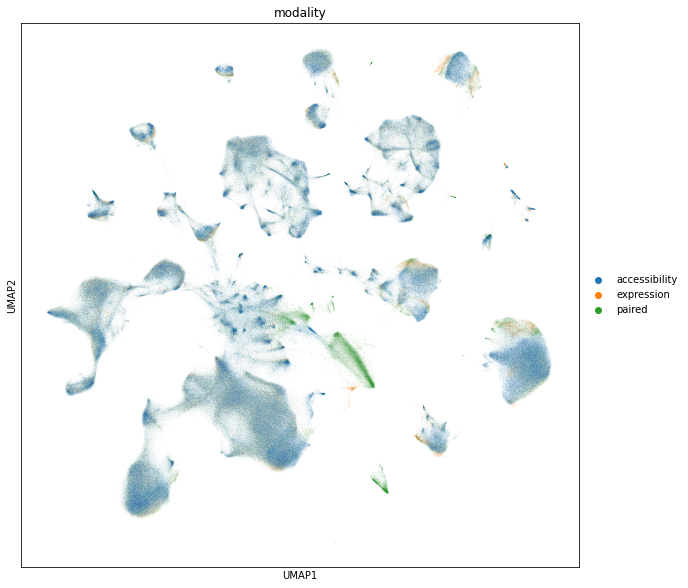

In [39]:
plt.rcParams["figure.figsize"] = (10, 10)
sc.pl.umap(adata_mvi, color='modality')

In [42]:
adata_mvi.obs.for_analysis.unique()

array([True, False, nan], dtype=object)

... storing 'Doublet_or_LowQuality' as categorical


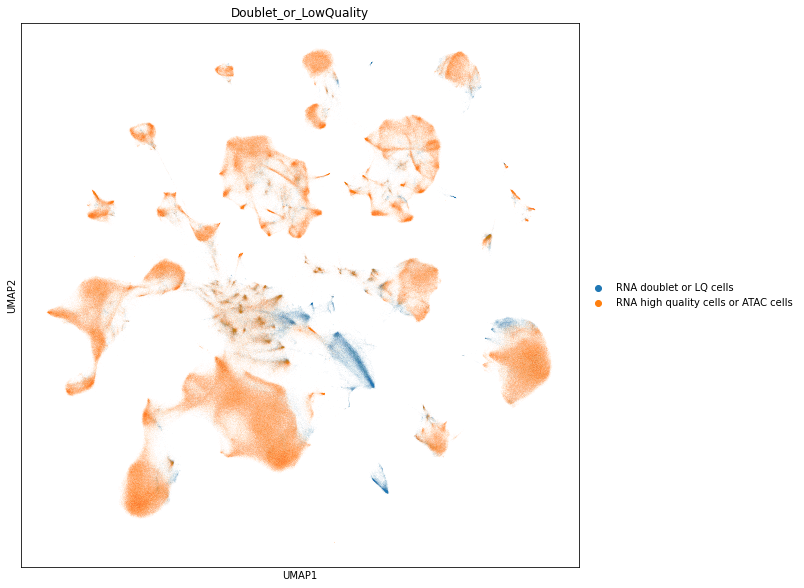

In [44]:
adata_mvi.obs["Doublet_or_LowQuality"] = np.where(adata_mvi.obs.for_analysis == False,
                                                  "RNA doublet or LQ cells", 
                                                  "RNA high quality cells or ATAC cells")

sc.pl.umap(adata_mvi, color='Doublet_or_LowQuality')

In [45]:
def compute_cell_quality(adata_mvi, cell_idx):
    idx = np.where(adata_mvi.uns['neighbors']['connectivities'][cell_idx].todense()>0)[1]
    df = adata_mvi.obs[["Doublet_or_LowQuality", "modality"]].iloc[idx]
    df = df.loc[df["modality"].isin(["paired", "expression"])]
    ratio = np.sum(df["Doublet_or_LowQuality"] == "RNA doublet or LQ cells") / df["Doublet_or_LowQuality"].shape[0]
    return ratio

In [46]:
cells = adata_mvi.uns['neighbors']['connectivities'].shape[0]
cells

1253610

In [47]:
qc_ratios = np.zeros(cells)
for i in np.arange(cells):
    ratio = compute_cell_quality(adata_mvi, i)
    qc_ratios[i] = ratio

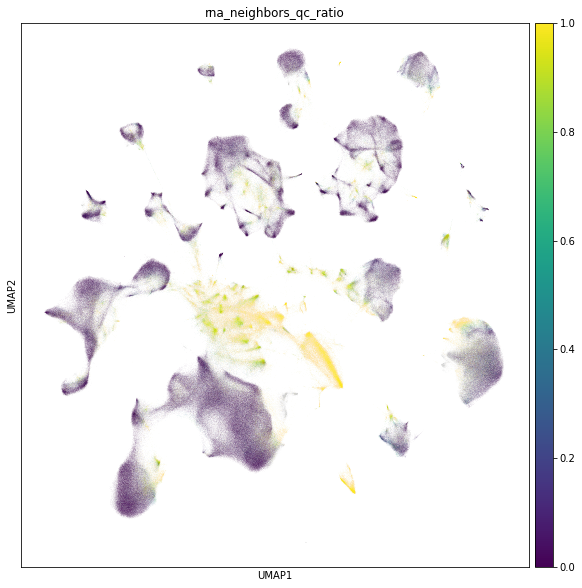

In [48]:
adata_mvi.obs["rna_neighbors_qc_ratio"] = qc_ratios
sc.pl.umap(adata_mvi, color="rna_neighbors_qc_ratio")

In [49]:
label = adata_mvi.obs['modality']
# label: paired, accessibility or expression

_, c = np.unique(label, return_counts=True)
theoretic_score = ((c / c.sum()) ** 2).sum()

In [50]:
def compute_cell_mixing(adata_mvi, cell_idx):
    idx = np.where(adata_mvi.uns['neighbors']['connectivities'][cell_idx].todense()>0)[1]
    df = adata_mvi.obs[["modality"]].iloc[idx]
    ratio = np.sum(df["modality"] == adata_mvi.obs["modality"][cell_idx]) / df["modality"].shape[0]
    return ratio / theoretic_score

In [51]:
modality_mixing = np.zeros(cells)
for i in np.arange(cells):
    ratio = compute_cell_mixing(adata_mvi, i)
    modality_mixing[i] = ratio

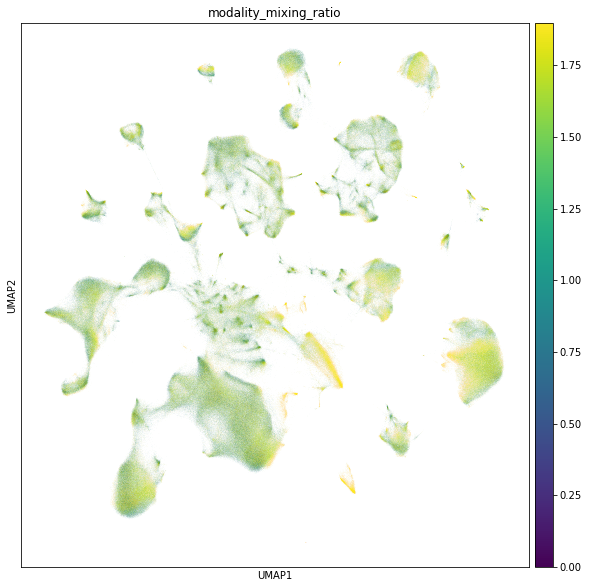

In [52]:
adata_mvi.obs["modality_mixing_ratio"] = modality_mixing
sc.pl.umap(adata_mvi, color='modality_mixing_ratio')

In [53]:
def compute_label_purity(adata_mvi, cell_idx):
    idx = np.where(adata_mvi.uns['neighbors']['connectivities'][cell_idx].todense()>0)[1]
    df = adata_mvi.obs[["subclass_scANVI"]].iloc[idx]
    df = df.loc[~df["subclass_scANVI"].isnull()]
    u, c = np.unique(df, return_counts=True)
    if np.size(c) == 0:
        ratio = 0
        label = 'NA'
    else:
        ratio = c[np.argmax(c)] / c.sum()
        label = u[np.argmax(c)]
    
    return ratio, label

In [54]:
cells = adata_mvi.shape[0]
purity_ratios = np.zeros(cells)
labels = adata_mvi.obs["subclass_scANVI"].to_numpy()
for i in np.arange(cells):
    ratio, label_ = compute_label_purity(adata_mvi, i)
    purity_ratios[i] = ratio
    labels[i] = label_

In [55]:
adata_mvi.obs["subclass_purity_ratio"] = purity_ratios
adata_mvi.obs["label_transfer"] = labels

... storing 'label_transfer' as categorical


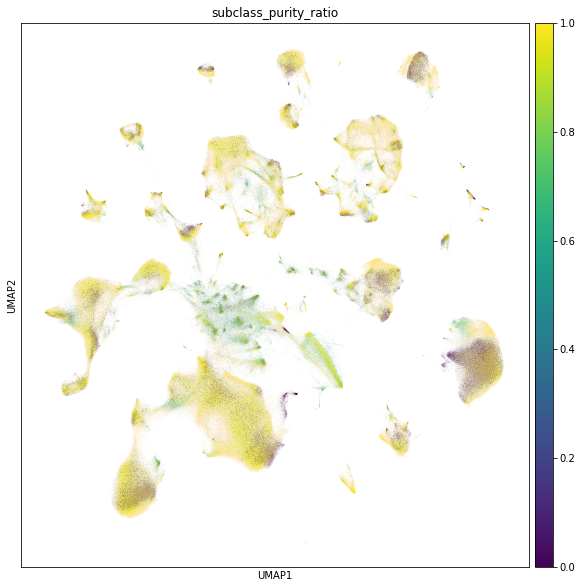

In [56]:
sc.pl.umap(adata_mvi, color='subclass_purity_ratio')

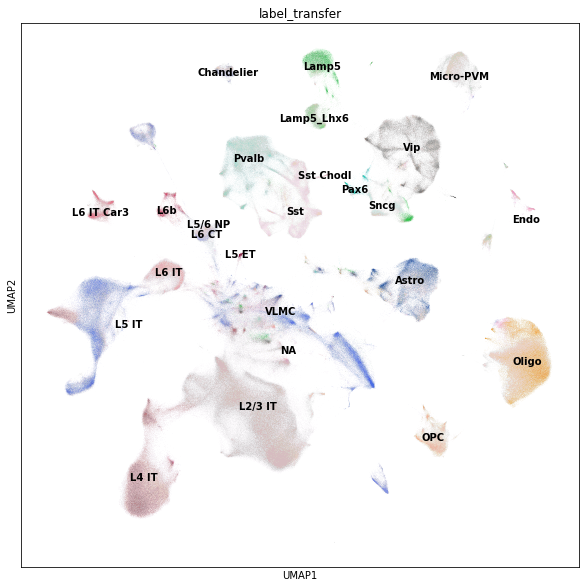

In [57]:
sc.pl.umap(adata_mvi, color='label_transfer', legend_loc="on data")

In [63]:
adata_mvi.obs.experiment_component_failed = adata_mvi.obs.experiment_component_failed.astype(str)

In [84]:
convert_columns = ['class',
 'neighborhood',
 'subclass',
 'subclass_color',
 'cluster',
 'cluster_color',
 'class_held',
 'subclass_held',
 'cluster_held',
 'supertype',
 'for_analysis']

In [85]:
adata_mvi.obs[convert_columns] = adata_mvi.obs[convert_columns].astype(str)

In [86]:
adata_mvi.write("multivi_AD_3cohorts_RNA_ATAC_Multiome_v2.0_annotation_updated.h5ad")

... storing 'class' as categorical
... storing 'neighborhood' as categorical
... storing 'subclass' as categorical
... storing 'subclass_color' as categorical
... storing 'cluster' as categorical
... storing 'cluster_color' as categorical
... storing 'class_held' as categorical
... storing 'subclass_held' as categorical
... storing 'cluster_held' as categorical
... storing 'supertype' as categorical
... storing 'for_analysis' as categorical


### Plot QC metric distribution

In [2]:
adata_mvi = anndata.read_h5ad(filename="multivi_AD_3cohorts_RNA_ATAC_Multiome_v2.0_annotation_updated.h5ad")

In [ ]:
## something might be useful.
# adata_mvi.obs["label_transfer"]
# adata_mvi.obs["rna_neighbors_qc_ratio"]
# adata_mvi.obs["modality_mixing_ratio"]
# adata_mvi.obs["subclass_purity_ratio"]

# adata_mvi.obs[["path_to_fragments", "label_transfer", "barcodes_out"]]

In [37]:
# Init Empty Data Containers
filters = np.arange(0.01, 1.01, 0.01)
rna_ratio = np.zeros_like(filters)
atac_ratio = np.zeros_like(filters)

In [38]:
# Separate RNA cells that are Good Quality
# ad = adata_mvi[adata_mvi.obs.modality.isin(["paired", "expression"])].copy()
# ad = ad[ad.obs["Doublet_or_LowQuality"] != "RNA doublet or LQ cells"].copy()
ad = adata_mvi[adata_mvi.obs.modality.isin(["paired", "expression"])]
ad = ad[ad.obs["Doublet_or_LowQuality"] != "RNA doublet or LQ cells"]

In [39]:
# Count how many of the good cell we are filtering at different thresholds
for i_, r_ in enumerate(filters):
    rna_ratio[i_] = np.sum(ad.obs["rna_neighbors_qc_ratio"] < r_) / ad.shape[0]

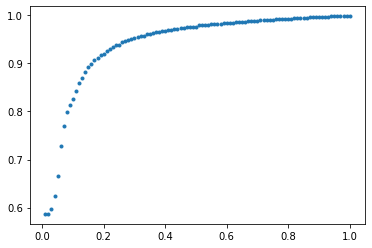

In [40]:
plt.plot(filters, rna_ratio, '.')

In [41]:
# Separate ATAC cells that are Good Quality
#ad = adata_mvi[adata_mvi.obs.modality == 'accessibility'].copy()
ad = adata_mvi[adata_mvi.obs.modality == 'accessibility']

In [42]:
# Count how many of the good cell we are filtering at different thresholds
for i_, r_ in enumerate(filters):
    atac_ratio[i_] = np.sum(ad.obs["rna_neighbors_qc_ratio"] < r_) / ad.shape[0]

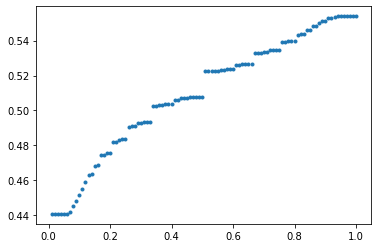

In [43]:
plt.plot(filters, atac_ratio, '.')

(array([5.33221e+05, 1.35000e+02, 2.55300e+03, 6.88500e+03, 1.11550e+04,
        1.66060e+04, 1.18870e+04, 1.10150e+04, 6.64200e+03, 6.38200e+03,
        7.33800e+03, 8.12600e+03, 6.90700e+03, 3.35000e+03, 6.82000e+03,
        3.23900e+03, 6.93800e+03, 1.47900e+03, 2.67000e+03, 5.52000e+02,
        7.47700e+03, 1.77100e+03, 2.06200e+03, 1.67400e+03, 1.76000e+02,
        7.93800e+03, 1.19100e+03, 1.15200e+03, 2.26800e+03, 5.59000e+02,
        1.35200e+03, 7.89000e+02, 1.24000e+02, 9.46600e+03, 3.08000e+02,
        7.67000e+02, 7.32000e+02, 1.04900e+03, 6.65000e+02, 9.40000e+01,
        2.74100e+03, 6.45000e+02, 1.42800e+03, 3.38000e+02, 6.49000e+02,
        5.47000e+02, 6.24000e+02, 4.78000e+02, 7.90000e+01, 0.00000e+00,
        1.45900e+04, 5.10000e+01, 4.79000e+02, 5.89000e+02, 3.74000e+02,
        6.72000e+02, 2.86000e+02, 1.26300e+03, 4.83000e+02, 7.50000e+01,
        2.29600e+03, 5.35000e+02, 9.09000e+02, 5.23000e+02, 5.40000e+02,
        1.95000e+02, 6.76600e+03, 3.20000e+01, 4.89

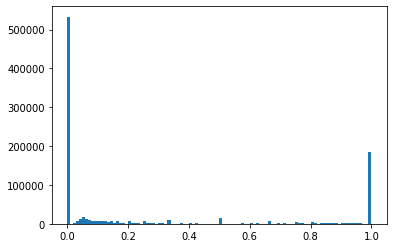

In [44]:
plt.hist(adata_mvi.obs["rna_neighbors_qc_ratio"], 100)

In [45]:
atac_ratio[:20]

array([0.44076126, 0.44076126, 0.44076126, 0.44076126, 0.44077286,
       0.44093991, 0.44164757, 0.44533089, 0.44826594, 0.45150726,
       0.45509545, 0.45899802, 0.46328691, 0.46350153, 0.46832058,
       0.46899344, 0.47461296, 0.47463964, 0.47566401, 0.47566633])

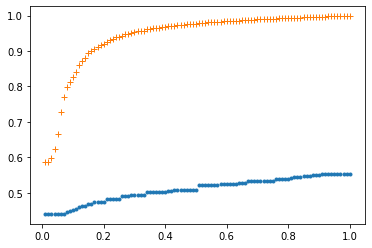

In [46]:
plt.plot(filters, atac_ratio, '.')
plt.plot(filters, rna_ratio, '+')

In [47]:
ad = adata_mvi[adata_mvi.obs.modality == 'accessibility']

In [48]:
np.sum(ad.obs["rna_neighbors_qc_ratio"].isnull()) / ad.shape[0]

0.33249496806826023

In [49]:
ad.obs["rna_neighbors_qc_ratio"][ad.obs["rna_neighbors_qc_ratio"] > 1]

Series([], Name: rna_neighbors_qc_ratio, dtype: float64)

In [50]:
ad.obs["rna_neighbors_qc_ratio"][ad.obs["rna_neighbors_qc_ratio"] > 0.999]

AAACGAACAAGGGTAC-L8AT_210916_01_B08_accessibility    1.0
AAACTGCCACCTACCT-L8AT_210916_01_B08_accessibility    1.0
AAAGGATGTAGGGTCA-L8AT_210916_01_B08_accessibility    1.0
AAAGGGCCATAGAATG-L8AT_210916_01_B08_accessibility    1.0
AAAGGGCGTAACTCCA-L8AT_210916_01_B08_accessibility    1.0
                                                    ... 
TTTACGTCAAGTTGCT-L8AT_211117_01_F07_accessibility    1.0
TTTACGTTCCATGTTT-L8AT_211117_01_F07_accessibility    1.0
TTTGGCCGTGAGCTAG-L8AT_211117_01_F07_accessibility    1.0
TTTGGTTAGTCCCTCT-L8AT_211117_01_F07_accessibility    1.0
TTTGTGTGTACCCATA-L8AT_211117_01_F07_accessibility    1.0
Name: rna_neighbors_qc_ratio, Length: 97865, dtype: float64

In [51]:
(97865 + 286609) / 861995

0.4460281092117704

In [28]:
adata_mvi.obs["neighbors_NA"] = adata_mvi.obs["rna_neighbors_qc_ratio"].isnull() * 1.0

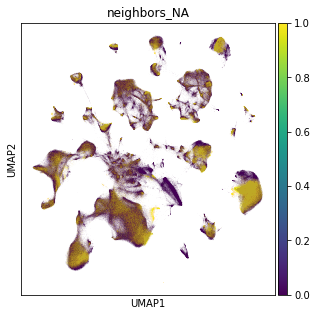

In [30]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(adata_mvi, color="neighbors_NA")

### Unsupervised clustering

In [1]:
import os
import warnings
import scvi
import anndata
import scipy
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
%matplotlib inline

sc.settings.n_jobs = 32
warnings.filterwarnings("ignore")

pwd = os.getcwd()

Global seed set to 0


In [2]:
adata_mvi = anndata.read_h5ad(filename="multivi_AD_3cohorts_RNA_ATAC_Multiome_v2.0_annotation_updated.h5ad")

In [3]:
from joblib import parallel_backend

In [4]:
sc.settings.n_jobs=32
with parallel_backend('threading', n_jobs=32):
    sc.tl.leiden(adata_mvi, key_added = "leiden_1.0") # default resolution in 1.0
## Scanpy Clustering Leiden (https://nbisweden.github.io/workshop-scRNAseq/labs/compiled/scanpy/scanpy_04_clustering.html)

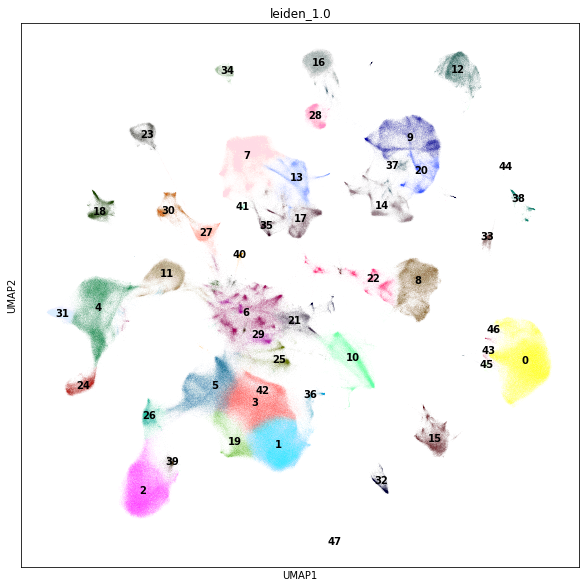

In [5]:
plt.rcParams["figure.figsize"] = (10, 10)
sc.pl.umap(adata_mvi, color=['leiden_1.0'], legend_loc='on data') ## this is default resolution

In [7]:
adata_mvi.write("multivi_AD_3cohorts_RNA_ATAC_Multiome_v2.0_annotation_updated.h5ad")

### Recalculate QC metrics for NAs in rna_neighbors_qc_ratio and label_transfer

In [12]:
np.where(adata_mvi.obs["rna_neighbors_qc_ratio"].isnull())[0].shape

(286679,)

In [3]:
adata_mvi.obs["rna_neighbors_qc_ratio_new"] = adata_mvi.obs["rna_neighbors_qc_ratio"]

In [4]:
def compute_cell_quality_all_neighbors(adata_mvi, cell_idx):
    idx = np.where(adata_mvi.uns['neighbors']['connectivities'][cell_idx].todense()>0)[1]
    df = adata_mvi.obs[["rna_neighbors_qc_ratio_new", "modality"]].iloc[idx]
    ratio = df["rna_neighbors_qc_ratio_new"].mean(skipna=True)
    return ratio

for i in np.where(adata_mvi.obs["rna_neighbors_qc_ratio_new"].isnull())[0]:
    adata_mvi.obs["rna_neighbors_qc_ratio_new"][i] = compute_cell_quality_all_neighbors(adata_mvi, i)

print(adata_mvi.obs["rna_neighbors_qc_ratio_new"].isnull().sum())

1027


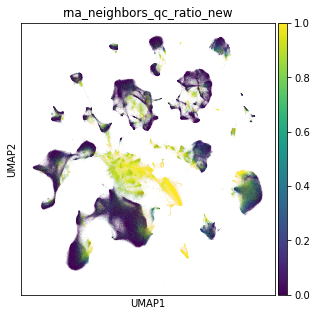

In [5]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(adata_mvi, color="rna_neighbors_qc_ratio_new")

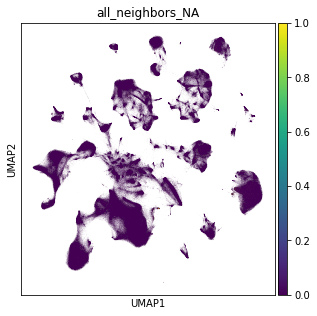

In [6]:
adata_mvi.obs["all_neighbors_NA"] = adata_mvi.obs["rna_neighbors_qc_ratio_new"].isnull() * 1.0

sc.pl.umap(adata_mvi, color="all_neighbors_NA")

### Test different filtering cutoff values -- cutoff 0.01

In [8]:
# Init Empty Data Containers
filters = np.arange(0.01, 1.01, 0.01)
rna_ratio = np.zeros_like(filters)
atac_ratio = np.zeros_like(filters)

In [9]:
# Separate RNA cells that are Good Quality
# ad = adata_mvi[adata_mvi.obs.modality.isin(["paired", "expression"])].copy()
# ad = ad[ad.obs["Doublet_or_LowQuality"] != "RNA doublet or LQ cells"].copy()
ad = adata_mvi[adata_mvi.obs.modality.isin(["paired", "expression"])]
ad = ad[ad.obs["Doublet_or_LowQuality"] != "RNA doublet or LQ cells"]

In [10]:
# Count how many of the good cell we are filtering at different thresholds
for i_, r_ in enumerate(filters):
    rna_ratio[i_] = np.sum(ad.obs["rna_neighbors_qc_ratio_new"] < r_) / ad.shape[0]

In [21]:
rna_ratio

array([0.58684404, 0.58737074, 0.59715348, 0.62345378, 0.66591921,
       0.72801983, 0.76990047, 0.79845087, 0.81355486, 0.82667983,
       0.84226405, 0.85935866, 0.87064792, 0.88160799, 0.89327292,
       0.89974439, 0.90676194, 0.91161845, 0.91741606, 0.91930986,
       0.92607955, 0.93097479, 0.93424345, 0.93872042, 0.93892955,
       0.9436389 , 0.9469153 , 0.94910344, 0.95167112, 0.95317765,
       0.95534255, 0.95731381, 0.95771659, 0.96122536, 0.96199605,
       0.96384338, 0.96502847, 0.96609736, 0.9674025 , 0.96764649,
       0.96938926, 0.97040781, 0.97195693, 0.97261531, 0.97341311,
       0.97413346, 0.97511715, 0.97595368, 0.97607374, 0.97607374,
       0.97890477, 0.97899384, 0.97981488, 0.98065141, 0.98105805,
       0.98156539, 0.98201851, 0.98283568, 0.98339336, 0.98348631,
       0.98440029, 0.98495411, 0.98555052, 0.98597653, 0.98655745,
       0.98674335, 0.98797878, 0.98799814, 0.98842415, 0.98907866,
       0.98928779, 0.98977964, 0.99018628, 0.99068588, 0.99070

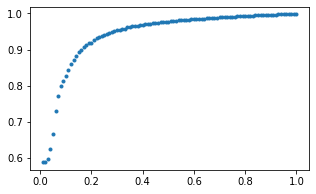

In [11]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.plot(filters, rna_ratio, '.')

In [12]:
# Separate ATAC cells that are Good Quality
#ad = adata_mvi[adata_mvi.obs.modality == 'accessibility'].copy()
ad = adata_mvi[adata_mvi.obs.modality == 'accessibility']

In [13]:
# Count how many of the good cell we are filtering at different thresholds
for i_, r_ in enumerate(filters):
    atac_ratio[i_] = np.sum(ad.obs["rna_neighbors_qc_ratio_new"] < r_) / ad.shape[0]

In [20]:
atac_ratio

array([0.48343784, 0.50045418, 0.51422224, 0.52583252, 0.53600891,
       0.54512033, 0.55415867, 0.56587567, 0.57653235, 0.58709621,
       0.59806611, 0.60892697, 0.61978898, 0.62605468, 0.63690973,
       0.64309422, 0.65448756, 0.65959547, 0.66547602, 0.67002129,
       0.68088098, 0.68531372, 0.69051677, 0.69478477, 0.6986421 ,
       0.71009345, 0.71366075, 0.71749604, 0.72219444, 0.72525015,
       0.72880933, 0.73169566, 0.73440797, 0.74675491, 0.74930597,
       0.75177582, 0.75426772, 0.75724801, 0.75951717, 0.7615659 ,
       0.76589655, 0.76801838, 0.7706518 , 0.77243487, 0.77447549,
       0.77643142, 0.77815997, 0.77976322, 0.78131428, 0.78272032,
       0.7997529 , 0.8011601 , 0.80245941, 0.80382137, 0.80527497,
       0.80687011, 0.80812418, 0.81002558, 0.81134809, 0.81252443,
       0.81562422, 0.81672516, 0.81829013, 0.81951751, 0.8205384 ,
       0.82149664, 0.8291765 , 0.83007674, 0.83098162, 0.83228441,
       0.83321829, 0.83514638, 0.83623803, 0.83708722, 0.83788

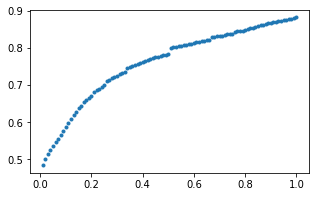

In [14]:
plt.plot(filters, atac_ratio, '.')

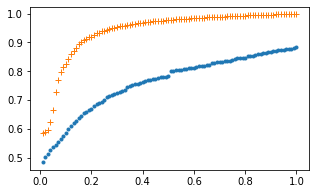

In [15]:
plt.plot(filters, atac_ratio, '.')
plt.plot(filters, rna_ratio, '+')

(array([570014.,  14805.,  14427.,  16895.,  19917.,  24305.,  19090.,
         17930.,  13299.,  12723.,  13674.,  14125.,  12573.,   8566.,
         11949.,   8064.,  11915.,   5857.,   6858.,   4469.,  11529.,
          5403.,   5557.,   5073.,   3508.,  11509.,   4210.,   4085.,
          5011.,   3188.,   3880.,   3263.,   2462.,  12083.,   2506.,
          2827.,   2698.,   3078.,   2544.,   1860.,   4576.,   2355.,
          3012.,   1872.,   2142.,   2069.,   2047.,   1851.,   1422.,
          1212.,  16333.,   1264.,   1593.,   1690.,   1500.,   1750.,
          1362.,   2274.,   1530.,   1090.,   3349.,   1433.,   1824.,
          1435.,   1388.,   1021.,   7746.,    808.,   1263.,   1747.,
          1078.,   2279.,   1457.,   1286.,    743.,   5791.,   1623.,
          1852.,   1433.,    780.,   4845.,   1956.,   1132.,   3999.,
          1688.,   3862.,   1711.,   3197.,   3311.,   1169.,   4073.,
          2162.,   3571.,   3243.,   3907.,   2410.,   2163.,   1373.,
      

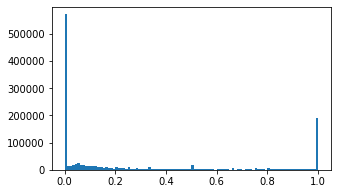

In [16]:
plt.hist(adata_mvi.obs["rna_neighbors_qc_ratio_new"], 100)

In [31]:
## most conservative threshold -- 0.01
ad_001 = adata_mvi[adata_mvi.obs["rna_neighbors_qc_ratio_new"].to_numpy() < 0.01]

In [37]:
print("filter cutoff value: " + str(filters[0]))
print("kept rna cell ratio: " + str(rna_ratio[0]))
print("kept atac cell ratio: " + str(atac_ratio[0]))

filter cutoff value: 0.01
kept rna cell ratio: 0.5868440416715077
kept atac cell ratio: 0.4834378389665833


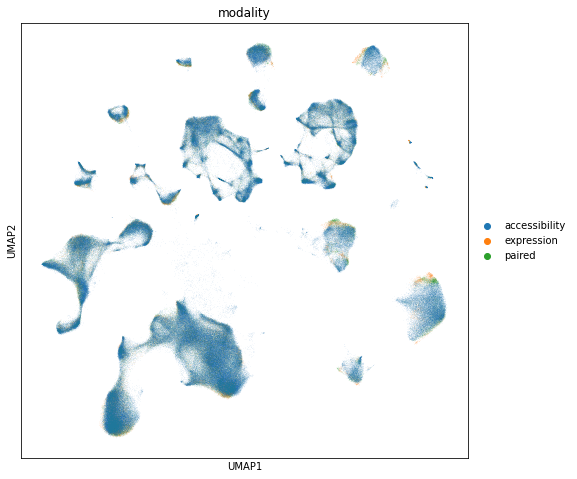

In [40]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.umap(ad_001, color='modality')

In [49]:
print("cutoff 0.01: there are " + str(np.where(ad_001.obs["label_transfer"] == 'NA')[0].shape) + " cells with NA in label_transfer")
print("original adata object: there are " + str(np.where(adata_mvi.obs["label_transfer"] == 'NA')[0].shape) + " cells with NA in label_transfer")

cutoff 0.01: there are (36793,) cells with NA in label_transfer
original adata object: there are (286679,) cells with NA in label_transfer


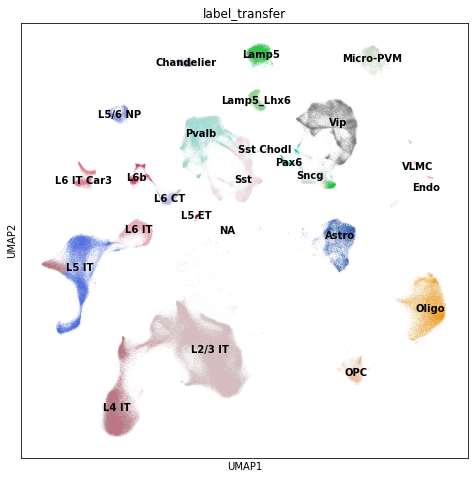

In [41]:
sc.pl.umap(ad_001, color='label_transfer', legend_loc="on data")

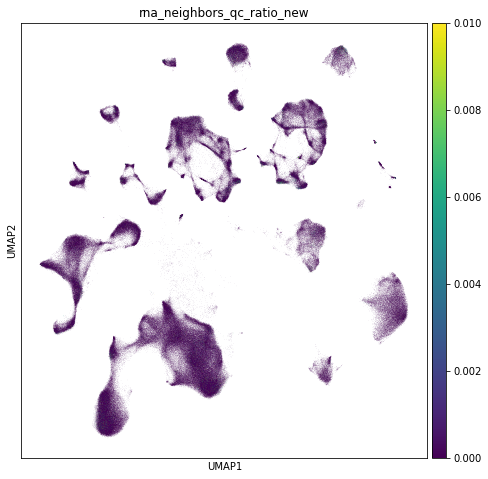

In [42]:
sc.pl.umap(ad_001, color="rna_neighbors_qc_ratio_new")

### Test different filtering cutoff values -- cutoff 0.2

In [38]:
## threshold -- 0.2
ad_020 = adata_mvi[adata_mvi.obs["rna_neighbors_qc_ratio_new"].to_numpy() <= 0.2]

In [22]:
print("filter cutoff value: " + str(filters[19]))
print("kept rna cell ratio: " + str(rna_ratio[19]))
print("kept atac cell ratio: " + str(atac_ratio[19]))

filter cutoff value: 0.2
kept rna cell ratio: 0.9193098640641338
kept atac cell ratio: 0.6700212878264955


In [26]:
## Memory Error (Trying to set attribute `._uns` of view, copying. )
# sc.pl.umap(ad_020, color='modality')

In [24]:
print("cutoff 0.2: there are " + str(np.where(ad_020.obs["label_transfer"] == 'NA')[0].shape) + " cells with NA in label_transfer")
print("original adata object: there are " + str(np.where(adata_mvi.obs["label_transfer"] == 'NA')[0].shape) + " cells with NA in label_transfer")

cutoff 0.2: there are (167797,) cells with NA in label_transfer
original adata object: there are (286679,) cells with NA in label_transfer


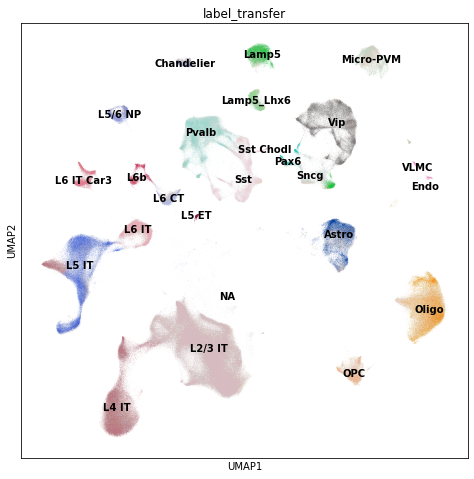

In [27]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.umap(ad_020, color='label_transfer', legend_loc="on data")

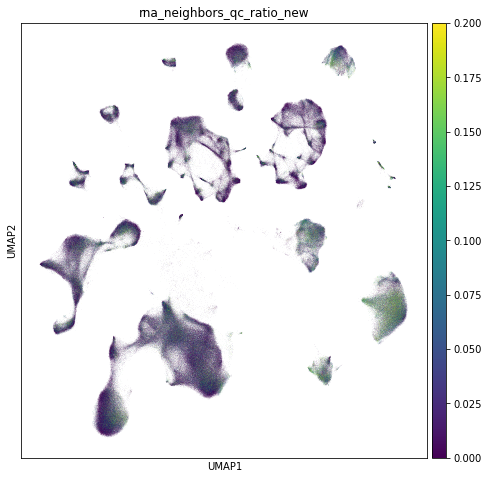

In [28]:
sc.pl.umap(ad_020, color="rna_neighbors_qc_ratio_new")

In [39]:
ad_020_NA = ad_020[ad_020.obs["rna_neighbors_qc_ratio_new"].isnull()]

### Test different filtering cutoff values -- cutoff 0.98

In [31]:
## threshold -- 0.98
ad_098 = adata_mvi[adata_mvi.obs["rna_neighbors_qc_ratio_new"].to_numpy() <= 0.98]

In [32]:
print("filter cutoff value: " + str(filters[97]))
print("kept rna cell ratio: " + str(rna_ratio[97]))
print("kept atac cell ratio: " + str(atac_ratio[97]))

filter cutoff value: 0.98
kept rna cell ratio: 0.9981255567174006
kept atac cell ratio: 0.8779169252721883


In [33]:
print("cutoff 0.98: there are " + str(np.where(ad_098.obs["label_transfer"] == 'NA')[0].shape) + " cells with NA in label_transfer")
print("original adata object: there are " + str(np.where(adata_mvi.obs["label_transfer"] == 'NA')[0].shape) + " cells with NA in label_transfer")

cutoff 0.98: there are (279304,) cells with NA in label_transfer
original adata object: there are (286679,) cells with NA in label_transfer


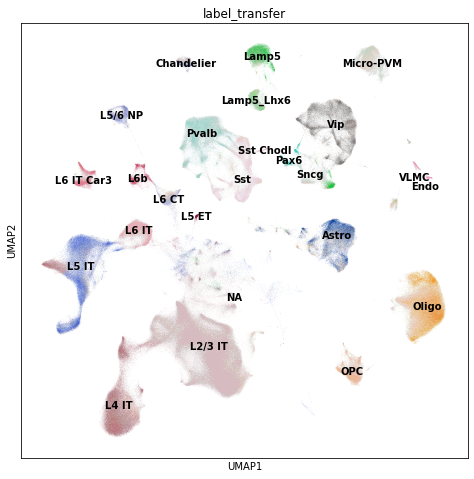

In [35]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.umap(ad_098, color='label_transfer', legend_loc="on data")

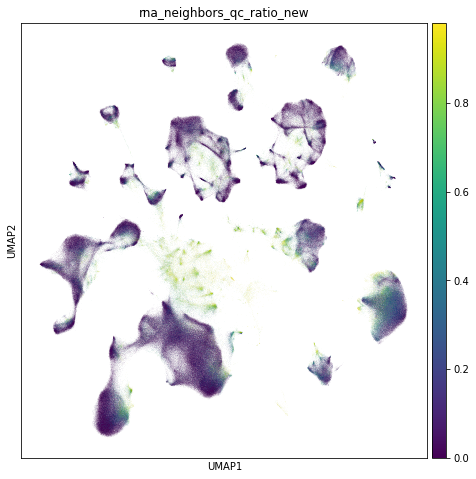

In [36]:
sc.pl.umap(ad_098, color="rna_neighbors_qc_ratio_new")